# Stochastic Block Model (SBM)

Let's imagine that we have $100$ students, each of whom can go to one of two possible schools: school one or school two. Our network has $100$ nodes, and each node represents a single student. The edges of this network represent whether a pair of students are friends. Intuitively, if two students go to the same school, it might make sense to say that they have a higher chance of being friends than if they do not go to the same school. If we were to try to characterize this network using an ER network, we would run into a problem: we have no way to capture the fact that which school students attend has an impact on who they might be friends with. Intuitively, there must be a better way!

The Stochastic Block Model, or SBM, captures this idea by assigning each of the $n$ nodes in the network to one of $K$ communities. A **community** is a group of nodes within the network. In our example case, the communities would represent the schools that students are able to attend in our network. In an SBM, instead of describing all pairs of nodes with a fixed probability like with the ER model, we instead describe properties that hold for edges between *pairs of communities*. In this sense, for a given school, we could think of the network that describes that school's students as ER.

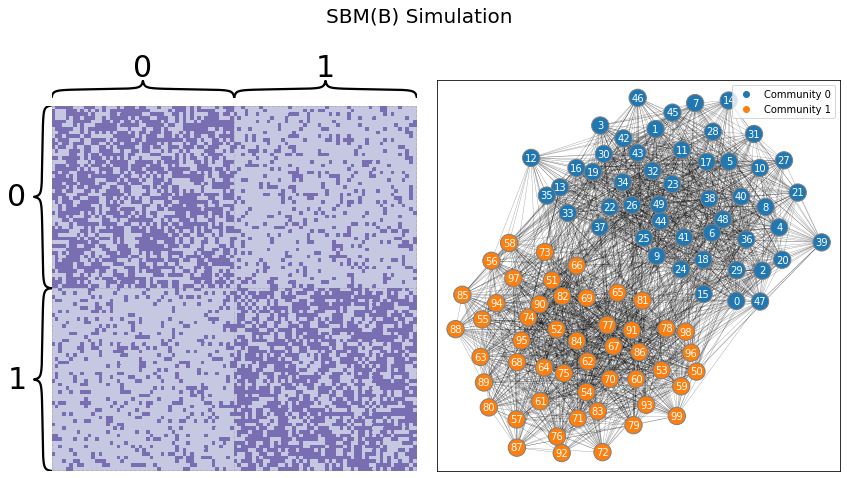

In [9]:
from graphbook_code import draw_multiplot
from graspologic.simulations import sbm

ns = [50, 50]  # network with 50 nodes
B = [[0.6, 0.2], [0.2, 0.6]]  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = sbm(n=ns, p=B, directed=False, loops=False)
ys = [0 for i in range(0, 50)] + [1 for i in range(0, 50)]
draw_multiplot(A, labels=ys, title="SBM(B) Simulation");

## *A Priori* Stochastic Block Model

The *a priori* SBM is an SBM in which we know ahead of time (*a priori*) which nodes are in which communities. Here, we will use the variable $K$ to denote the maximum number of different communities. The ordering of the communities does not matter; the community we call $1$ versus $2$ versus $K$ is largely a symbolic distinction (the only thing that matters is that they are *different*). The *a priori* SBM has the following parameter:

| Parameter | Space | Description |
| --- | --- | --- |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |

To describe the *A Priori* SBM, we will designate the community each node is a part of using a vector, which has a single community assignment for each node in the network. We will call this **node assignment vector** $\vec{\tau}$, and it is a $n$-length vector (one element for each node) with elements which can take values from $1$ to $K$. In symbols, we would say that $\vec\tau \in \{1, ..., K\}^n$. What this means is that for a given element of $\vec \tau$, $\tau_i$, that $\tau_i$ is the community assignment (either $1$, $2$, so on and so forth up to $K$) for the $i^{th}$ node. If there we hahd an example where there were $2$ communities ($K = 2$) for instance, and the first two nodes are in community $1$ and the second two in community $2$, then $\vec\tau$ would be a vector which looks like:
\begin{align*}
    \vec\tau &= \begin{bmatrix}1 & 1 & 2 & 2\end{bmatrix}^\top
\end{align*}

Next, let's discuss the matrix $B$, which is known as the **block matrix** of the SBM. We write down that $B \in [0, 1]^{K \times K}$, which means that the block matrix is a matrix with $K$ rows and $K$ columns. If we have a pair of nodes and know which of the $K$ communities each node is from, the block matrix tells us the probability that those two nodes are connected. If our networks are simple, the matrix $B$ is also symmetric, which means that if $b_{kk'} = p$ where $p$ is a probability, that $b_{k'k} = p$, too. The requirement of $B$ to be symmetric exists *only* if we are dealing with undirected networks.

Finally, let's think about how to write down the generative model for the *a priori* SBM. Intuitionally what we want to reflect is, if we know that node $i$ is in community $k'$ and node $j$ is in community $k$, that the $(k', k)$ entry of the block matrix is the probability that $i$ and $j$ are connected. We say that given  $\tau_i = k'$ and $\tau_j = k$, $\mathbf a_{ij}$ is sampled independently from a $Bern(b_{k' k})$ distribution for all $j > i$. Note that the adjacencies $\mathbf a_{ij}$ are not *necessarily* identically distributed, because the probability depends on the community of edge $(i,j)$. If $\mathbf A$ is an *a priori* SBM network with parameter $B$, and $\vec{\tau}$ is a realization of the node-assignment vector, we write that $\mathbf A \sim SBM_{n,\vec \tau}(B)$.

### Code Examples

We just covered a lot of intuition! This intuition will come in handy later, but let's take a break from the theory by working through an example. Say we have $100$ students, and we know that each student goes to one of two possible schools. We will begin by thinking about the *a priori* SBM, since it's a little more straightforward to generate samples. Remember the *a priori* SBM is the SBM where already know $\vec{\tau}$ ahead of time. We don't really care too much about the ordering of the students for now, so let's just assume that the first $50$ students all go to the first school, and the second $50$ students all go to the second school. 

```{admonition} Thought Exercise

Before you read on, try to think to yourself about what the node-assignment vector $\vec \tau$ looks like.
```

Next, let's plot what $\vec \tau$ look like:

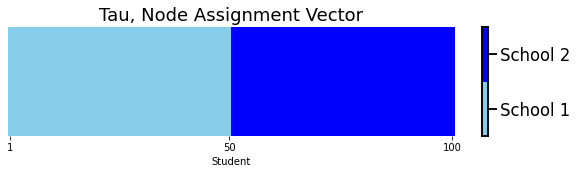

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

def plot_tau(tau, title="", xlab="Node"):
    cmap = matplotlib.colors.ListedColormap(["skyblue", 'blue'])
    fig, ax = plt.subplots(figsize=(10,2))
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap((tau - 1).reshape((1,tau.shape[0])), cmap=cmap,
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        cbar.set_ticks([0.25, .75])
        cbar.set_ticklabels(['School 1', 'School 2'])
        ax.set(xlabel=xlab)
        ax.set_xticks([.5,49.5,99.5])
        ax.set_xticklabels(["1", "50", "100"])
        cbar.ax.set_frame_on(True)
    return

n = 100  # number of students

# tau is a column vector of 150 1s followed by 50 2s
# this vector gives the school each of the 300 students are from
tau = np.vstack((np.ones((int(n/2),1)), np.full((int(n/2),1), 2)))

plot_tau(tau, title="Tau, Node Assignment Vector",
        xlab="Student")

So as we can see, the first $50$ students are from the first school, and the second $50$ students are from second school.

Let's assume that the students from the first school are better friends in general than the students from the second school, so we'll say that the probability of two students who both go to the first school being friends is $0.5$, and the probability of two students who both go to school $2$ being friends is $0.3$. Finally, let's assume that if one student goes to the first school and the other student goes to school $2$, that the probability that they are friends is $0.2$.
 
```{admonition} Thought Exercise

Before you read on, try to think to yourself about what the block matrix $B$ looks like.
```

 Next, let's look at the block matrix $B$: 

In [14]:
K = 2  # 2 communities in total
# construct the block matrix B as described above
B = [[0.5, 0.2], [0.2, 0.3]]

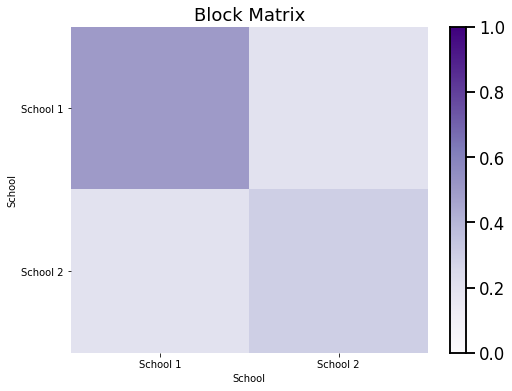

In [15]:

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(B, title="Block Matrix")
plt.show()

As we can see, the matrix $B$ is a symmetric block matrix, since our network is undirected. Finally, let's sample a single network from the SBM with parameters $\vec \tau$ and $B$:

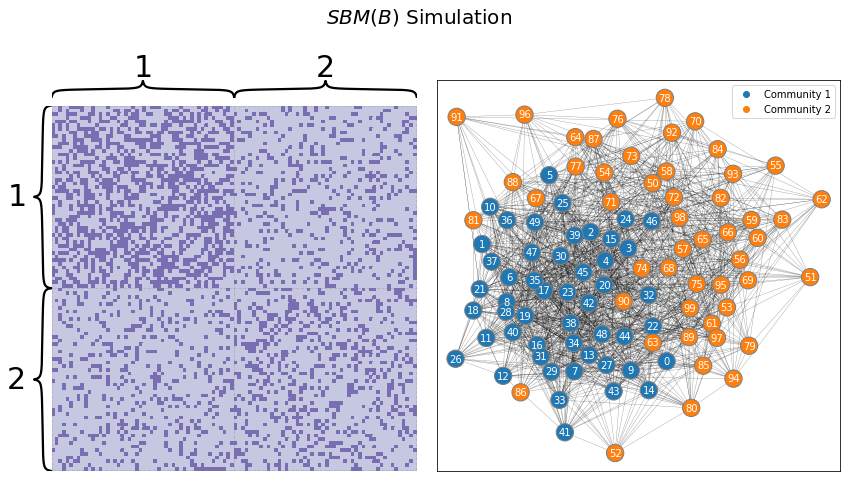

In [20]:
from graspologic.simulations import sbm
from graphbook_code import draw_multiplot
import pandas as pd

# sample a graph from SBM_{300}(tau, B)
A = sbm(n=[int(n/2), int(n/2)], p=B, directed=False, loops=False)
ys = [1 for i in range(0, 50)] + [2 for i in range(0, 50)]
draw_multiplot(A, labels=ys, title="$SBM(B)$ Simulation");

The above network shows students, ordered by the school they are in (first school and school 2, respectively). As we can see in the above network, people from the first school are more connected than people from school $2$. Also, the connections between people from different schools appear to be a bit *more sparse* (fewer edges) than connections betwen schools. The above heatmap can be described as **modular**: it has clear communities. Remember that the connections for each node are indicated by a single row, or a single column, of the adjacency matrix. The first half of the rows have strong connections with the first half of the columns, which indicates that the first half of students tend to be better friends with other students in the first half. We can duplicate this argument for the second half of students ot see that it seems reasonable to conclude that there are two communities of students here.

Something easy to mistake about the SBM is that the SBM will *not always* have the obvious modular structure we can see above when we look at a heatmap. Rather, this modular structure is *only* made obvious because the students are ordered according to the school in which they are in. What do you think will happen if we look at the students in a random order? Do you think that he structure that exists in this network will be obvious?

The answer is: *No!* Let's see what happens when we reorder the nodes from the network into a random order, and pretend we don't know the true community labels ahead of time:

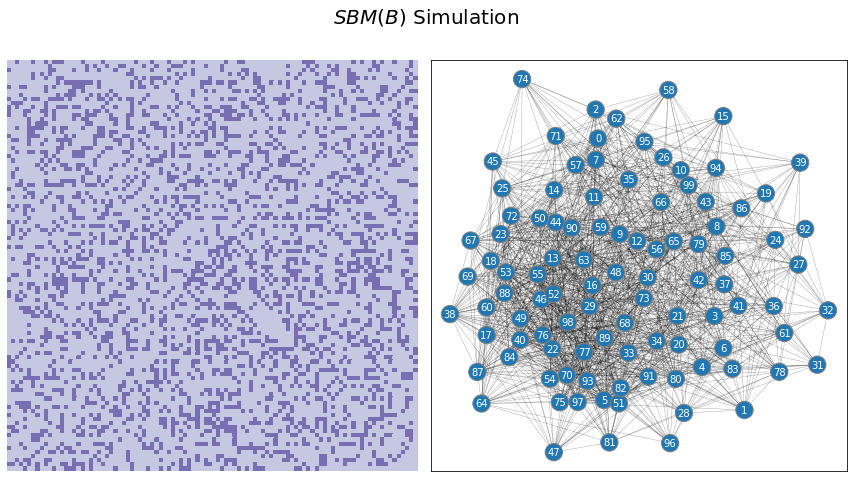

In [23]:
import numpy as np

# generate a reordering of the n nodes
vtx_perm = np.random.choice(n, size=n, replace=False)

Aperm = A[tuple([vtx_perm])] [:,vtx_perm]
yperm = np.array(ys)[vtx_perm]
draw_multiplot(Aperm, title="$SBM(B)$ Simulation");

Now, the students are *not* organized according to school, because they have been randomly reordered. It becomes pretty tough to figure out whether there are communities in our network just by looking at an adjacency matrix, unless you are looking at a network in which the nodes are *already arranged* in an order which respects the community structure. 

In practice, this means that if you know ahead of time what natural groupings of the nodes might be (such as knowing which school each student goes to) by way of your node attributes, you can visualize your data according to that grouping. If you don't know anything about natural groupings of nodes, however, we are left with the problem of *estimating community structure*. A later method, called the *spectral embedding*, will be paired with clustering techniques to allow us to estimate node assignment vectors.

### Probability*

What does the probability for the *a priori* SBM look like? In our previous description, we admittedly simplified things to an extent to keep the wording down. In truth, we model the *a priori* SBM using a *latent variable* model, which means that the node assignment vector, $\vec{\pmb \tau}$, is treated as *random*. For the case of the *a priori* SBM, it just so happens that we *know* the specific value that this latent variable $\vec{\pmb \tau}$ takes, $\vec \tau$, ahead of time. 

Fortunately, since $\vec \tau$ is a *parameter* of the *a priori* SBM, the probability is a bit simpler than for the *a posteriori* SBM. This is because the *a posteriori* SBM requires an integration over potential realizations of $\vec{\pmb \tau}$, whereas the *a priori* SBM does not, since we already know that $\vec{\pmb \tau}$ was realized as $\vec\tau$.

Putting these steps together gives us that:
\begin{align*}
\mathbb P_\theta(A) &= \mathbb P_{\theta}(\mathbf A = A | \vec{\pmb \tau} = \vec\tau) \\
&= \prod_{j > i} \mathbb P_\theta(\mathbf a_{ij} = a_{ij} | \vec{\pmb \tau} = \vec\tau),\;\;\;\;\textrm{Independence Assumption}
\end{align*}

Next, for the *a priori* SBM, we know that each edge $\mathbf a_{ij}$ only *actually* depends on the community assignments of nodes $i$ and $j$, so we know that $\mathbb P_{\theta}(\mathbf a_{ij} = a_{ij} | \vec{\pmb \tau} = \vec\tau) = \mathbb P(\mathbf a_{ij} = a_{ij} | \tau_i = k', \tau_j = k)$, where $k$ and $k'$ are any of the $K$ possible communities. This is because the community assignments of nodes that are not nodes $i$ and $j$ do not matter for edge $ij$, due to the independence assumption. 

Next, let's think about the probability matrix $P = (p_{ij})$ for the *a priori* SBM. We know that, given that $\tau_i = k'$ and $\tau_j = k$,  each adjacency $\mathbf a_{ij}$ is sampled independently and identically from a $Bern(b_{k',k})$ distribution. This means that $p_{ij} = b_{k',k}$. Completing our analysis from above:
\begin{align*}
    \mathbb P_\theta(A) &= \prod_{j > i} b_{k'k}^{a_{ij}}(1 - b_{k'k})^{1 - a_{ij}} \\
    &= \prod_{k,k' \in [K]}b_{k'k}^{m_{k'k}}(1 - b_{k'k})^{n_{k'k} - m_{k'k}}
\end{align*}

Where $n_{k' k}$ denotes the total number of edges possible between nodes assigned to community $k'$ and nodes assigned to community $k$. That is, $n_{k' k} = \sum_{j > i} \mathbb 1_{\tau_i = k'}\mathbb 1_{\tau_j = k}$. Further, we will use $m_{k' k}$ to denote the total number of edges observed between these two communities. That is, $m_{k' k} = \sum_{j > i}\mathbb 1_{\tau_i = k'}\mathbb 1_{\tau_j = k}a_{ij}$. Note that for a single $(k',k)$ community pair, that the probability is analogous to the probability of a realization of an ER random variable.

<!--- We can formalize this a bit more explicitly. If we let $A^{\ell k}$ be defined as the subgraph *induced* by the edges incident nodes in community $\ell$ and those in community $k$, then we can say that $A^{\ell k}$ is a directed ER random network, --->

Like the ER model, there are again equivalence classes of the sample space $\mathcal A_n$ in terms of their probability. For a two-community setting, with $\vec \tau$ and $B$ given, the equivalence classes are the sets:
\begin{align*}
    E_{a,b,c}(\vec \tau, B) &= \left\{A \in \mathcal A_n : m_{11} = a, m_{21}=m_{12} = b, m_{22} = c\right\}
\end{align*}

The number of equivalence classes possible scales with the number of communities, and the manner in which nodes are assigned to communities (particularly, the number of nodes in each community). 


## *A Posteriori* Stochastic Block Model

In the *a posteriori* Stochastic Block Model (SBM), we consider that node assignment to one of $K$ communities is a random variable, that we *don't* know already like te *a priori* SBM. We're going to see a funky word come up, that you're probably not familiar with, the **$K$ probability simplex**. What the heck is a probability simplex?

The intuition for a simplex is probably something you're very familiar with, but just haven't seen a word describe. Let's say I have a vector, $\vec\pi = (\pi_k)_{k \in [K]}$, which has a total of $K$ elements. $\vec\pi$ will be a vector, which indicates the *probability* that a given node is assigned to each of our $K$ communities, so we need to impose some additional constraints. Symbolically, we would say that, for all $i$, and for all $k$:
\begin{align*}
    \pi_k = \mathbb P(\pmb\tau_i = k)
\end{align*}
The $\vec \pi$ we're going to use has a very special property: all of its elements are non-negative: for all $\pi_k$, $\pi_k \geq 0$. This makes sense since $\pi_k$ is being used to represent the probability of a node $i$ being in group $k$, so it certainly can't be negative. Further, there's another thing that we want our $\vec\pi$ to have: in order for each element $\pi_k$ to indicate the probability of something to be assigned to $k$, we need all of the $\pi_k$s to sum up to one. This is because of something called the Law of Total Probability. If we have $K$ total values that $\pmb \tau_i$ could take, then it is the case that:
\begin{align*}
    \sum_{k=1}^K \mathbb P(\pmb \tau_i = k) = \sum_{k = 1}^K \pi_k = 1
\end{align*}
So, back to our question: how does a probability simplex fit in? Well, the $K$ probability simplex describes all of the possible values that our vector $\vec\pi$ could take! In symbols, the $K$ probability simplex is:
\begin{align*}
\left\{\vec\pi : \text{for all $k$ }\pi_k \geq 0, \sum_{k = 1}^K \pi_k = 1 \right\}
\end{align*}
So the $K$ probability simplex is just the space for all possible vectors which could indicate assignment probabilities to one of $K$ communities. 

What does the probability simplex look like yy? Below, we take a look at the $2$-probability simplex (2-d $\vec\pi$s) and the $3$-probability simplex (3-dimensional $\vec\pi$s):

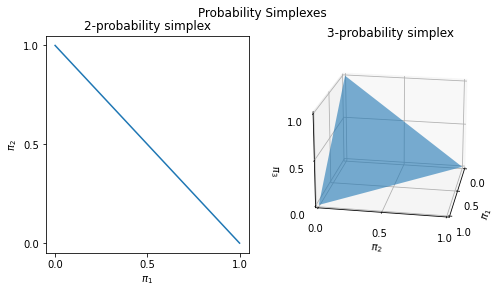

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig=plt.figure(figsize=plt.figaspect(.5))
fig.suptitle("Probability Simplexes")
ax=fig.add_subplot(1,2,1)
x=[1,0]
y=[0,1]
ax.plot(x,y)
ax.set_xticks([0,.5,1])
ax.set_yticks([0,.5,1])
ax.set_xlabel("$\pi_1$")
ax.set_ylabel("$\pi_2$")
ax.set_title("2-probability simplex")

ax=fig.add_subplot(1,2,2,projection='3d')
x = [1,0,0]
y = [0,1,0]
z = [0,0,1]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, alpha=.6))
ax.view_init(elev=20,azim=10)
ax.set_xticks([0,.5,1])
ax.set_yticks([0,.5,1])
ax.set_zticks([0,.5,1])
ax.set_xlabel("$\pi_1$")
ax.set_ylabel("$\pi_2$")
h=ax.set_zlabel("$\pi_3$", rotation=0)
ax.set_title("3-probability simplex")
plt.show()

The values of $\vec\pi = (\pi)$ that are in the $K$-probability simplex are indicated by the shaded region of each figure. This comprises the $(\pi_1, \pi_2)$ pairs that fall along a diagonal line from $(0,1)$ to $(1,0)$ for the $2$-simplex, and the $(\pi_1, \pi_2, \pi_3)$ tuples that fall on the surface of the triangular shape above with nodes at $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.

This model has the following parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $\vec \pi$ | the $K$ probability simplex | The probability of a node being assigned to community $K$ |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |

The *a posteriori* SBM is a bit more complicated than the *a priori* SBM. We will think about the *a posteriori* SBM as a variation of the *a priori* SBM, where instead of the node-assignment vector being treated as a known fixed value (the community assignments), we will treat it as *unknown*. $\vec{\pmb \tau}$ is called a *latent variable*, which means that it is a quantity that is never actually observed, but which will be useful for describing our model. In this case, $\vec{\pmb \tau}$ takes values in the space $\{1,...,K\}^n$. This means that for a given realization of $\vec{\pmb \tau}$, denoted by $\vec \tau$, that for each of the $n$ nodes in the network, we suppose that an integer value between $1$ and $K$ indicates which community a node is from. Statistically, we write that the node assignment for node $i$, denoted by $\pmb \tau_i$, is sampled independently and identically from $Categorical(\vec \pi)$. Stated another way, the vector $\vec\pi$ indicates the probability $\pi_k$ of assignment to each community $k$ in the network.

The matrix $B$ behaves exactly the same as it did with the *a posteriori* SBM. Finally, let's think about how to write down the generative model in the *a posteriori* SBM. The model for the *a posteriori* SBM is, in fact, nearly the same as for the *a priori* SBM: we still say that given $\tau_i = k'$ and $\tau_j = k$, that $\mathbf a_{ij}$ are independent $Bern(b_{k'k})$. Here, however, we also describe that $\pmb \tau_i$ are sampled independent and identically from $Categorical(\vec\pi)$, as we learned above. If $\mathbf A$ is the adjacency matrix for an *a posteriori* SBM network with parameters $\vec \pi$ and $B$, we write that $\mathbf A \sim SBM_n(\vec \pi, B)$. 

### Probability*

What does the probability for the *a posteriori* SBM look like? In this case, $\theta = (\vec \pi, B)$ are the parameters for the model, so the probability for a realization $A$ of $\mathbf A$ is:
\begin{align*}
\mathbb P_\theta(A) &= \mathbb P_\theta(\mathbf A = A)
\end{align*}
Next, we use the fact that the probability that $\mathbf A = A$ is, in fact, the *integration* (over realizations of $\vec{\pmb \tau}$) of the joint $(\mathbf A, \vec{\pmb \tau})$. In this case, we will let $\mathcal T = \{1,...,K\}^n$ be the space of all possible realizations that $\vec{\pmb \tau}$ could take:
\begin{align}
\mathbb P_\theta(A)&= \sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A, \vec{\pmb \tau} = \vec \tau) 
\end{align}
Next, remember that by definition of a conditional probability for a random variable $\mathbf x$ taking value $x$ conditioned on random variable $\mathbf y$ taking the value $y$, that $\mathbb P(\mathbf x = x | \mathbf y = y) = \frac{\mathbb P(\mathbf x = x, \mathbf y = y)}{\mathbb P(\mathbf y = y)}$. Note that by multiplying through by $\mathbf P(\mathbf y = y)$, we can see that $\mathbb P(\mathbf x = x, \mathbf y = y) = \mathbb P(\mathbf x = x| \mathbf y = y)\mathbb P(\mathbf y = y)$. Using this logic for $\mathbf A$ and $\vec{\pmb \tau}$:
\begin{align*}
\mathbb P_\theta(A) &=\sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A| \vec{\pmb \tau} = \vec \tau)\mathbb P(\vec{\pmb \tau} = \vec \tau)
\end{align*}
Intuitively, for each term in the sum, we are treating $\vec{\pmb \tau}$ as taking a fixed value, $\vec\tau$, to evaluate this probability statement. 

We will start by describing $\mathbb P(\vec{\pmb \tau} = \vec\tau)$. Remember that for $\vec{\pmb \tau}$, that each entry $\pmb \tau_i$ is sampled *independently and identically* from $Categorical(\vec \pi)$.The probability mass for a $Categorical(\vec \pi)$-valued random variable is $\mathbb P(\pmb \tau_i = \tau_i; \vec \pi) = \pi_{\tau_i}$. Finally, note that if we are taking the products of $n$ $\pi_{\tau_i}$ terms, that many of these values will end up being the same. Consider, for instance, if the vector $\tau = [1,2,1,2,1]$. We end up with three terms of $\pi_1$, and two terms of $\pi_2$, and it does not matter which order we multiply them in. Rather, all we need to keep track of are the counts of each $\pi$ term. Written another way, we can use the indicator that $\tau_i = k$, given by $\mathbb 1_{\tau_i = k}$, and a running counter over all of the community probability assignments $\pi_k$ to make this expression a little more sensible. We will use the symbol $n_k = \sum_{i = 1}^n \mathbb 1_{\tau_i = k}$ to denote this value, which is the number of nodes in community $k$:
\begin{align*}
\mathbb P_\theta(\vec{\pmb \tau} = \vec \tau) &= \prod_{i = 1}^n \mathbb P_\theta(\pmb \tau_i = \tau_i),\;\;\;\;\textrm{Independence Assumption} \\
&= \prod_{i = 1}^n \pi_{\tau_i} ,\;\;\;\;\textrm{p.m.f. of a Categorical R.V.}\\
&= \prod_{k = 1}^K \pi_{k}^{n_k},\;\;\;\;\textrm{Reorganizing what we are taking products of}
\end{align*}
Next, let's think about the conditional probability term, $\mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau)$. Remember that the entries are all independent conditional on $\vec{\pmb \tau}$ taking the value $\vec\tau$. It turns out this is exactly the same result that we obtained for the *a priori* SBM:
\begin{align*}
\mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau)
&= \prod_{k',k} b_{\ell k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}
\end{align*}

Combining these into the integrand gives:
\begin{align*}
\mathbb P_\theta(A) &= \sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau) \mathbb P_\theta(\vec{\pmb \tau} = \vec \tau) \\
&= \sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \left[\pi_k^{n_k}\cdot \prod_{k'=1}^K b_{k' k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}\right]
\end{align*}

Evaluating this sum explicitly proves to be relatively tedious and is a bit outside of the scope of this book, so we will omit it here.

## Degree-Corrected Stochastic Block Model (DCSBM)

Let's think back to our school example for the Stochastic Block Model. Remember, we had 100 students, each of whom could go to one of two possible schools: school one or school two. Our network had 100 nodes, representing each of the students. We said that the school for which each student attended was represented by their node assignment $\tau_i$ to one of two possible communities. The matrix $B$ was the block probaability matrix, where $b_{11}$ was the probability that students in school one were friends, $b_{22}$ was the probability that students in school two were friends, and $b_{12} = b_{21}$ was the probability that students were friends if they did not go to the same school. In this case, we said that $\mathbf A \sim SBM_n(\tau, B)$. 

When would this setup not make sense? Let's say that Alice and Bob both go to the same school, but Alice is more popular than Bob. In general since Alice is more popular than Bob, we might want to say that for any clasasmate, Alice gets an additional "popularity benefit" to her probability of being friends with the other classmate, and Bob gets an "unpopularity penalty." The problem here is that within a single community of an SBM, the SBM assumes that the **node degree** (the number of nodes each nodes is connected to) is the *same* for all nodes within a single community. This means that we would be unable to reflect this benefit/penalty system to Alice and Bob, since each student will have the same number of friends, on average. This problem is referred to as the **degree homogeneity** in a Stochastic Block Model Network. Degree homogeneity just means that the node degree is *homogeneous*, or the same, for all nodes within a community.


```{admonition} Degree Homogeneity in a Stochastic Block Model Network
Suppose that $\mathbf A \sim SBM_{n, \vec\tau}(B)$, where $\mathbf A$ has $K=2$ communities. What is the node degree of each node in $\mathbf A$?

For an arbitrary node $v_i$ which is in community $k$ (either one or two), we will compute the expectated value of the degree $deg(v_i)$, written $\mathbb E\left[deg(v_i); \tau_i = k\right]$. We will let $n_k$ represent the number of nodes whose node assignments $\tau_i$ are to community $k$. Let's see what happens:
\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \mathbb E\left[\sum_{j = 1}^n \mathbf a_{ij}\right] \\
    &= \sum_{j = 1}^n \mathbb E[\mathbf a_{ij}]
\end{align*}
We use the *linearity of expectation* again to get from the top line to the second line. Next, instead of summing over all the nodes, we'll break the sum up into the nodes which are in the same community as node $i$, and the ones in the *other* community $k'$. We use the notation $k'$ to emphasize that $k$ and $k'$ are different values: 

\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \sum_{j : i \neq j, \tau_j = k} \mathbb E\left[\mathbf a_{ij}\right] + \sum_{j : \tau_j =k'} \mathbb E[\mathbf a_{ij}]
\end{align*}
In the first sum, we have $n_k-1$ total edges (the number of nodes that aren't node $i$, but are in the same community), and in the second sum, we have $n_{k'}$ total edges (the number of nodes that are in the other community). Finally, we will use that the probability of an edge in the same community is $b_{kk}$, but the probability of an edge between the communities is $b_{k' k}$. Finally, we will use that the expected value of an adjacency $\mathbf a_{ij}$ which is Bernoulli distributed is its probability:
\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \sum_{j : i \neq j, \tau_j = k} b_{kk} + \sum_{j : \tau_j = \ell} b_{kk'},\;\;\;\;\mathbf a_{ij}\textrm{ are Bernoulli distributed} \\
    &= (n_k - 1)b_{kk} + n_{k'} b_{kk'}
\end{align*}
This holds for any node $i$ which is in community $k$. Therefore, the expected node degree is the same, or **homogeneous**, within a community of an SBM.
```

To address this limitation, we turn to the Degree-Corrected Stochastic Block Model, or DCSBM. As with the Stochastic Block Model, there is both a *a priori* and *a posteriori* DCSBM.

### *A Priori* DCSBM

Like the *a priori* SBM, the *a priori* DCSBM is where we know which nodes are in which communities ahead of time. Here, we will use the variable $K$ to denote the number of different communiies. The *a priori* DCSBM has the following two parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |
| $\vec\theta$ | $\mathbb R^n_+$ | The degree correction vector, which adjusts the degree for pairs of nodes |

The latent community assignment vector $\vec{\pmb \tau}$ with a known *a priori* realization $\vec{\tau}$ and the block matrix $B$ are exactly the same for the *a priori* DCSBM as they were for the *a priori* SBM.

The vector $\vec\theta$ is the degree correction vector. Each entry $\theta_i$ is a positive scalar. $\theta_i$ defines how much more (or less) edges associated with node $i$ are connected due to their association with node $i$.

Finally, let's think about how to write down the generative model for the *a priori* DCSBM. We say that $\tau_i = k'$ and $\tau_j = k$, $\mathbf a_{ij}$ is sampled independently from a $Bern(\theta_i \theta_j b_{k'k})$ distribution for all $j > i$. As we can see, $\theta_i$ in a sense is "correcting" the probabilities of each adjacency to node $i$ to be higher, or lower, depending on the value of $\theta_i$ that that which is given by the block probabilities $b_{\ell k}$. If $\mathbf A$ is an *a priori* DCSBM network with parameters and $B$, we write that $\mathbf A \sim DCSBM_{n,\vec\tau}(\vec \theta, B)$.

#### Probability*

The derivation for the probability is the same as for the *a priori* SBM, with the change that $p_{ij} = \theta_i \theta_j b_{k'k}$ instead of just $b_{k'k}$. This gives that the probability turns out to be:

\begin{align*}
    \mathbb P_\theta(A) &= \prod_{j > i} \left(\theta_i \theta_j b_{k'k}\right)^{a_{ij}}\left(1 - \theta_i \theta_j b_{k'k}\right)^{1 - a_{ij}}
\end{align*}
The expression doesn't simplify much more due to the fact that the probabilities are dependent on the particular $i$ and $j$, so we can't just reduce the statement in terms of $n_{k'k}$ and $m_{k'k}$ like for the SBM.

### *A Posteriori* DCSBM

The *a posteriori* DCSBM is to the *a posteriori* SBM what the *a priori* DCSBM was to the *a priori* SBM. The changes are very minimal, so we will omit explicitly writing it all down here so we can get this section wrapped up, with the idea that the preceding section on the *a priori* DCSBM should tell you what needs to change.

<!-- TODO: return to add equivalence classes -->